In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

# 1절 시각화 개요

- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)...
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스에도 내부적으로 matplotlib 사용
- seaborn : matplotlib을 기반으로 다양한 색, 테마, 차트 기능을 추가한 라이브러리.

# 2절 matplotlib

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html<br>
https://matplotlib.org/stable/api/pyplot_summary.html

## 2.1 패키지 임포트 및 기본 설정

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.3.4'

%matplotlib inline : 주피터노트북이 실행되는 브라우저에서 시각화를 해라..<br>
%config InlineBackend.figure_format='retina' : 그래프 해상도를 높임. 'png'(기본값), 'jpge', 'svg', 'pdf'

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## 2.2 그래프 그리기

- Matplotlib 로 그래프를 그리기 위해서 다음의 단계 따른다.
    1) 데이터 준비<br>
    2) 그래프 생성<br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장

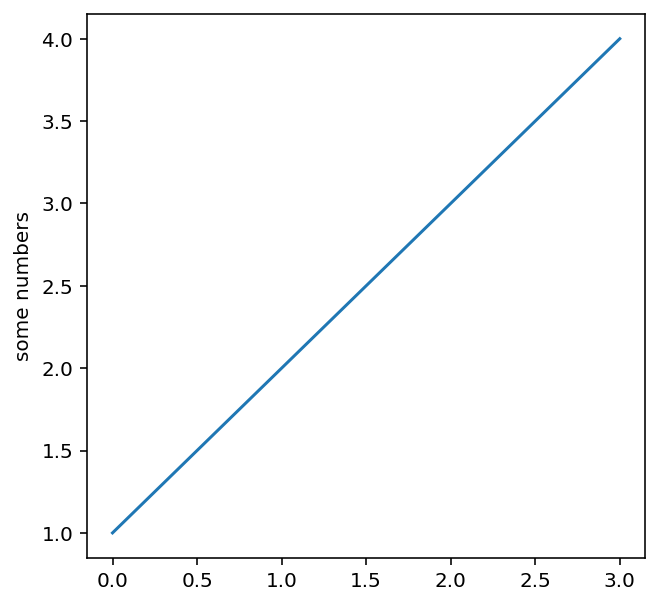

In [7]:
plt.figure(figsize=(5,5)) # 2)그래프 객체 생성 사이즈는 인치
plt.plot([1,2,3,4]) # 3)그래프 함수로 그리기
plt.ylabel('some numbers') # 4) 그래프 커스터마이징
plt.show() # 5) 그래프 출력

## 2.3 그래프 영역 나누기

### 1) subplot()함수로 서브플롯 추가

In [9]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

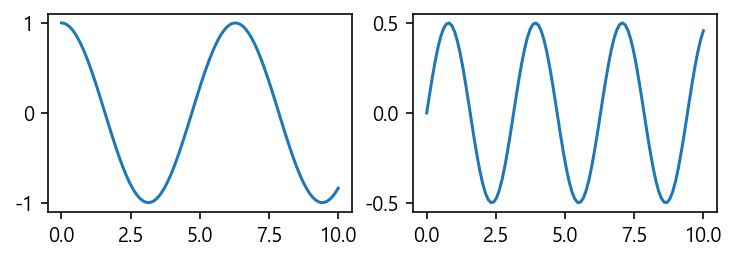

In [173]:
plt.subplot(2, 1, 2) # 2행 1열의 subplot에서 1번째 subplot에 plot을 그릴거야
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열의 subplot에서 3번째 subplot에 plot을 그릴거야
#plt.subplot(223)
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4)
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

In [20]:
import pandas as pd
pd.np.nan

nan

In [19]:
# 경고 메세지를 안 보이게
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default') 경고 메세지를 보이게

### 2) subplots() 함수로 서브플롯 그리기

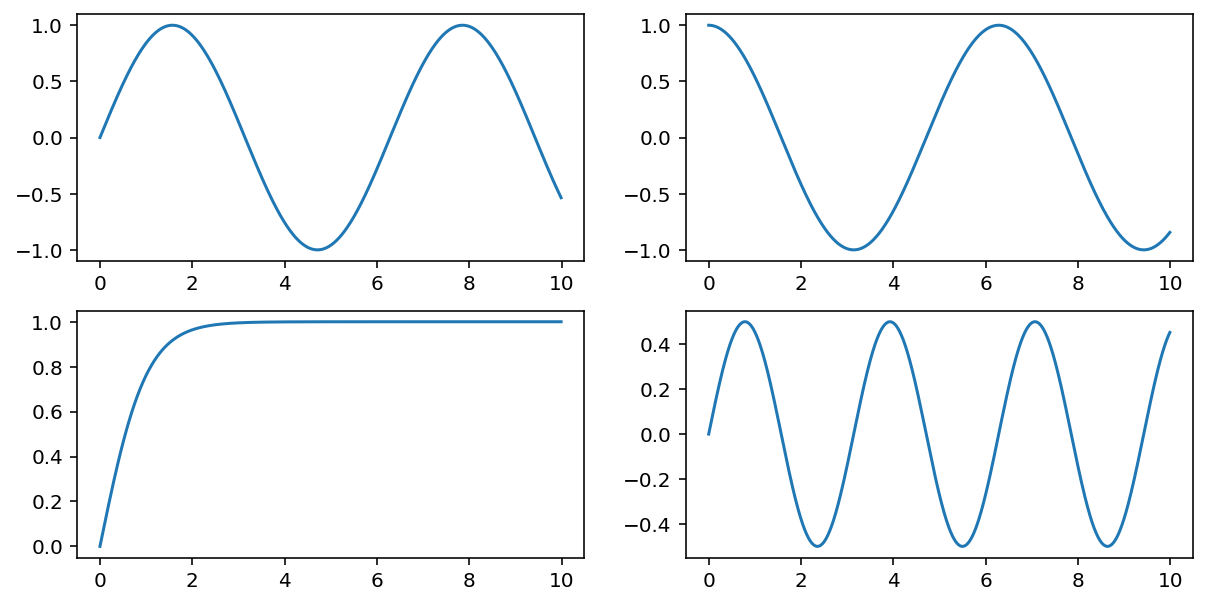

In [22]:
# 방법1 (2행2열 서브플롯)
plt.figure(figsize=(10,5))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3); plt.plot(x, np.tanh(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

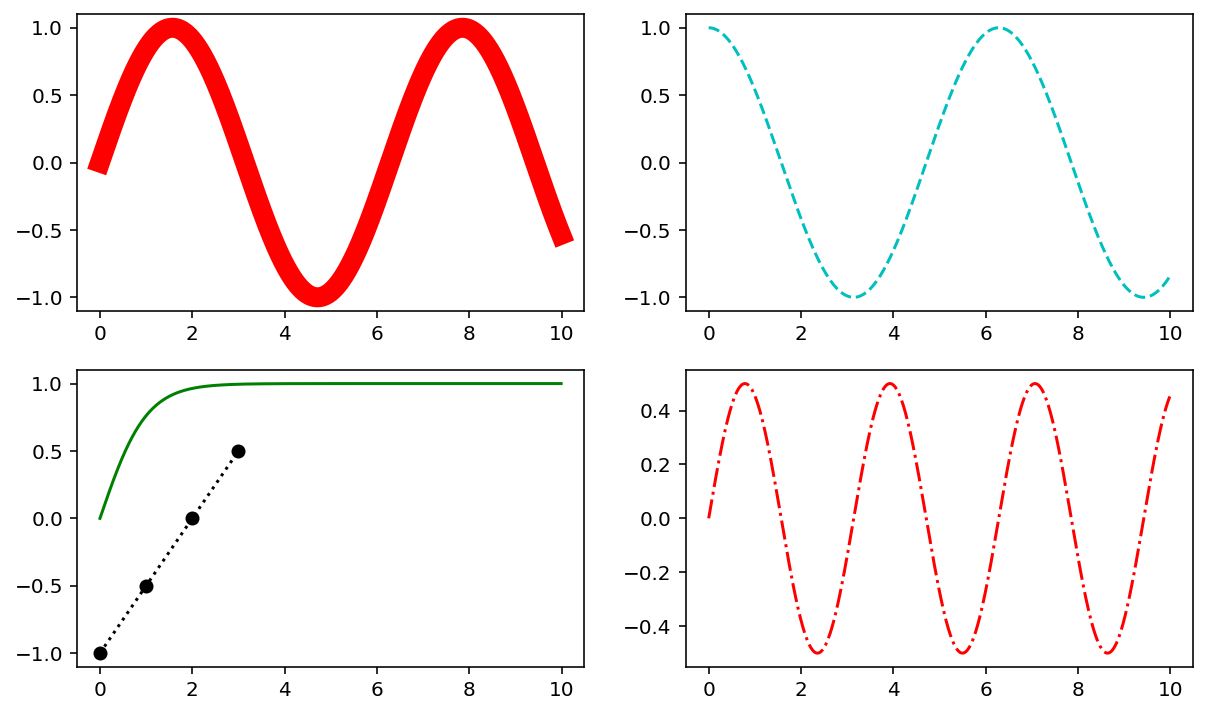

In [39]:
# 방법2 (2행2열 서브플롯)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].plot(x, np.sin(x), color='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # c(cyan청록), --(대시드된 라인)
axes[1,0].plot(x, np.tanh(x), 'g')
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k;black, o;o마커, :점선
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

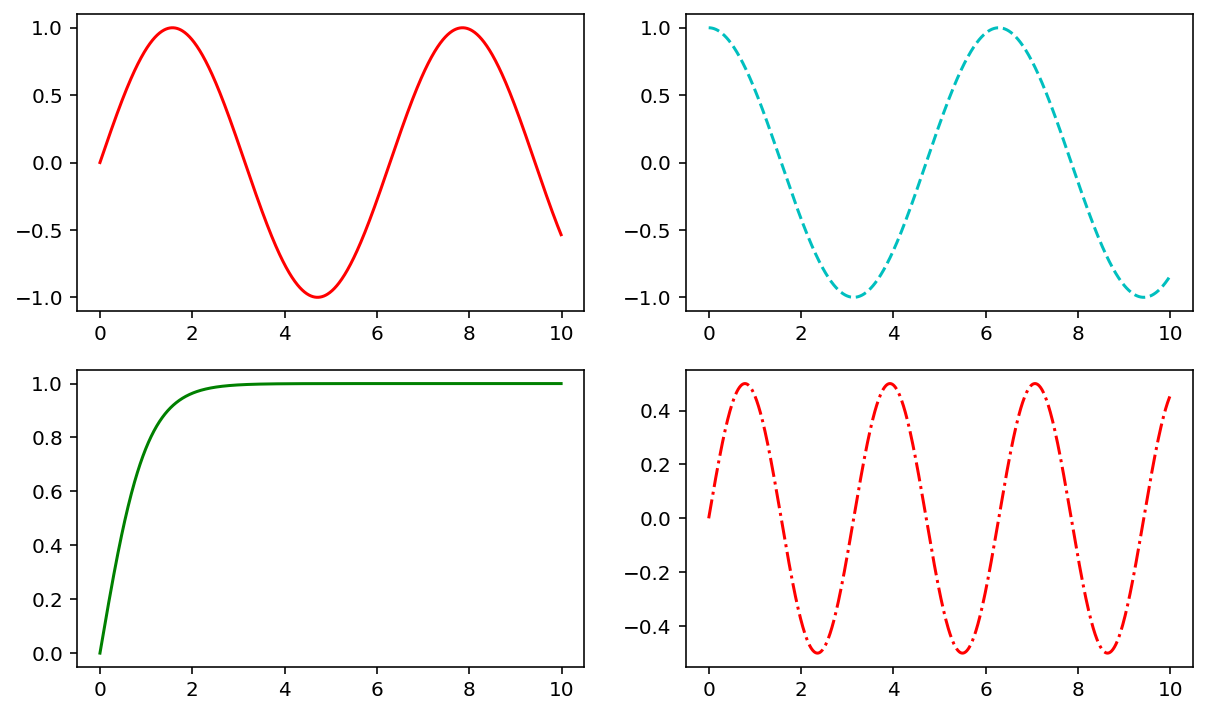

In [42]:
# 방법3 (2행2열 서브플롯)
# def sin_cos(x):
#     return np.sin(x)*np.cos(x)
func_list = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
# func_list = [np.sin, np.cos, np.tanh, sin_cos]
fmt_list = ['r', 'c--', 'g', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func_list[i](x), fmt_list[i])

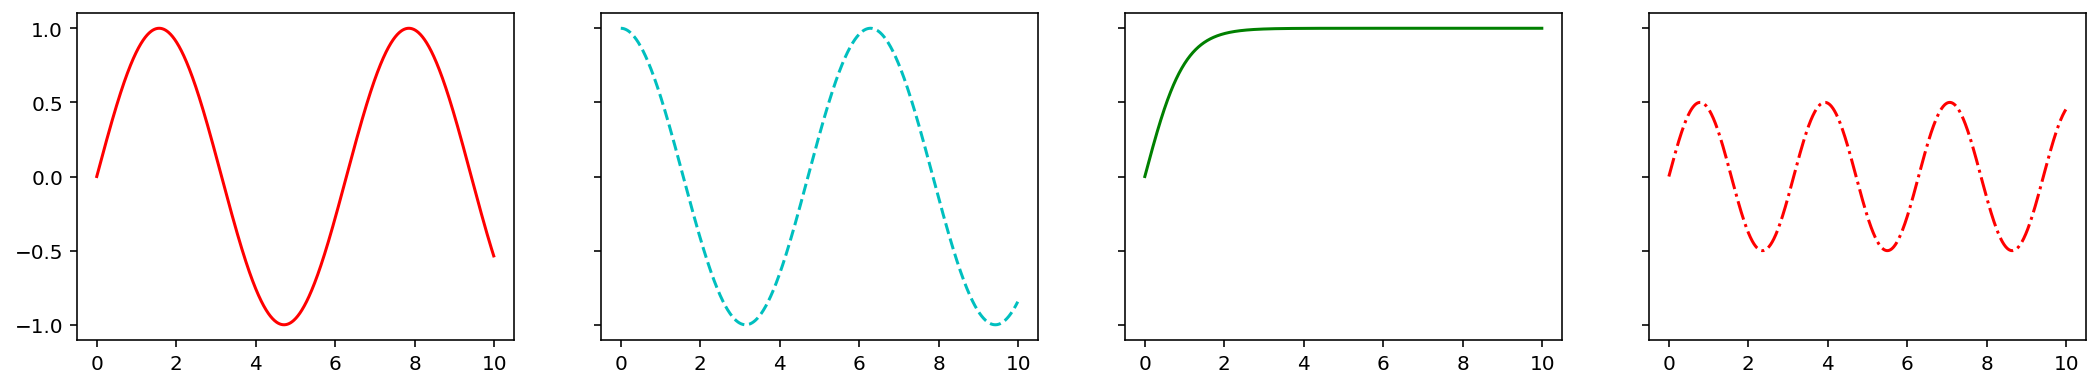

In [45]:
fig, axes = plt.subplots(ncols=4, figsize=(18,3), sharey=True)
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() ; 선그래프

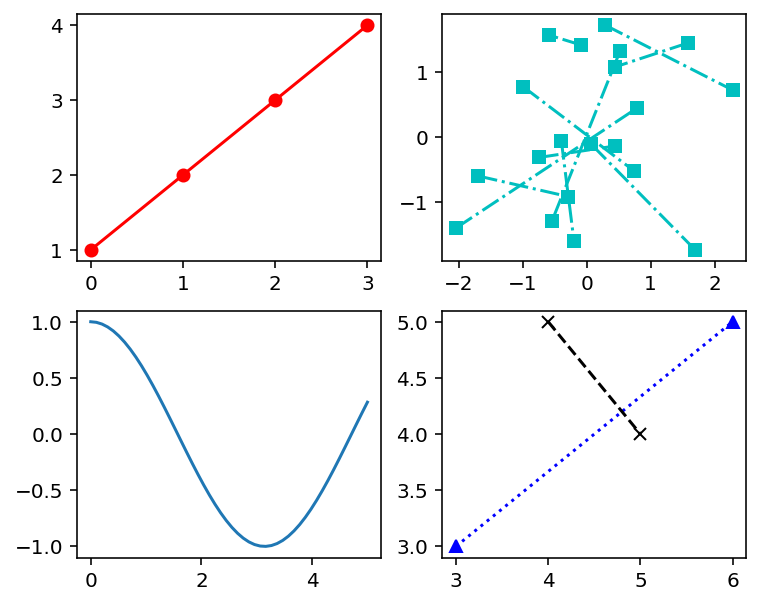

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(6,5))
axes[0,0].plot([1,2,3,4], 'ro-') # r(빨), o(동그라미마커), -(실선)
axes[0,1].plot(np.random.randn(2,10), # 평균0, 표준편차가1인 표준정규분포
               np.random.randn(2,10),
               'cs-.') # c(cyan청록), s(네모마커), -.(대쉬드닷)
axes[1,0].plot(np.linspace(0,5), 
               np.cos(np.linspace(0,5)))
axes[1,1].plot([3,6],[3,5], 'b^:')  # b(blue), ^(마커), :(점선)
axes[1,1].plot([4,5],[5,4], 'kx--') # k(black), x(x마커), --(대쉬드)
plt.show()

### 3) pandas.DataFrame.plot() 
   plt.plot(x, y, [fmt]) <br>
   df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim...)<br>
    * kind : line(기본값), scatter, bar, barh(수평바), hist, box, density=kde, area, pie<br>
    * figsize : tuple(인치단위) <br>
    * xlime, ylim : list/tuple

In [50]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
: 범례 사용 설명

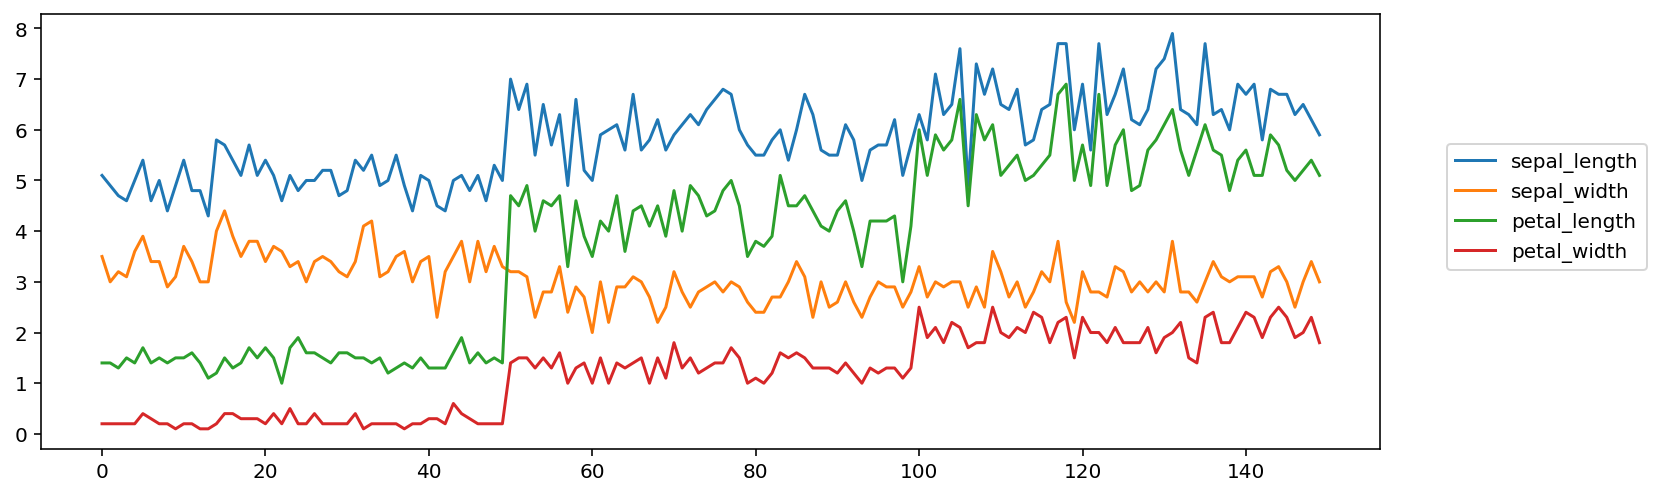

In [57]:
s = iris_df.plot(kind='line', figsize=(12,4))
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)

https://ko.wikipedia.org/wiki/상자_수염_그림

https://matplotlib.org/stable/tutorials/colors/colormaps.html


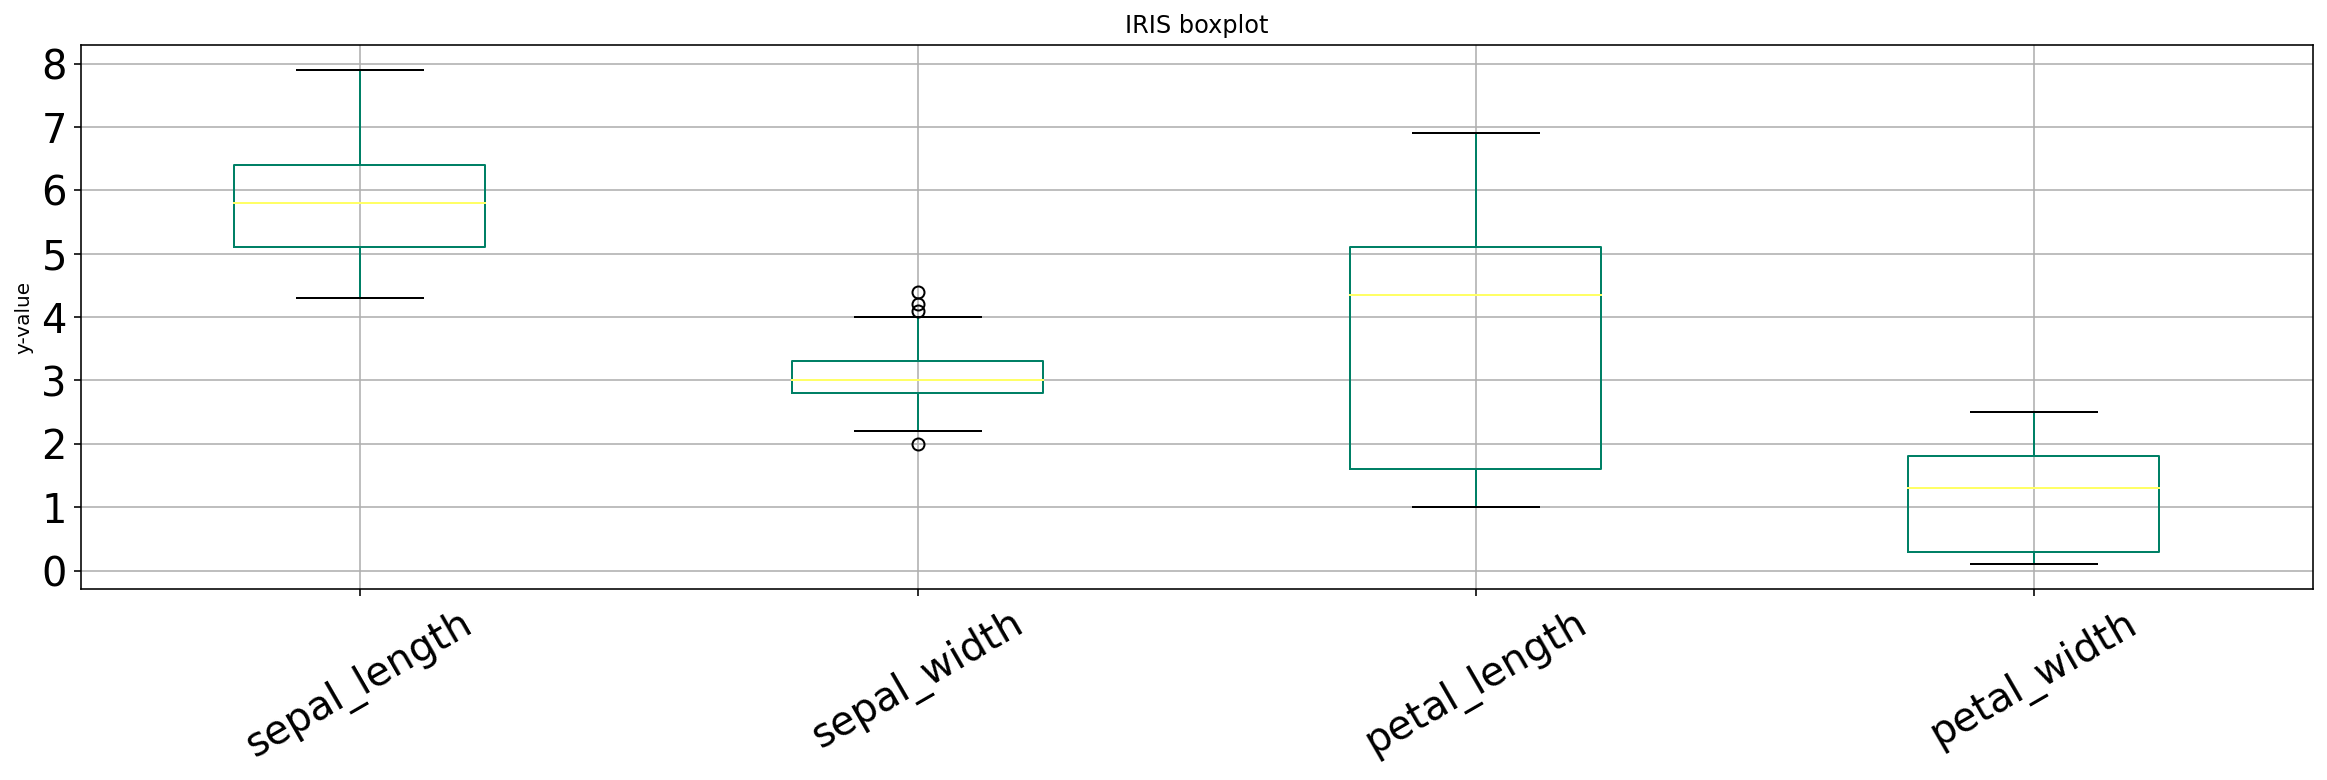

In [71]:
# iris_df.plot.box()
iris_df.plot(kind='box', figsize=(20,5), title='IRIS boxplot',
            ylabel='y-value', grid=True, fontsize=20, rot=30, colormap='summer')
plt.show()

In [74]:
# iris_df에서 상관관계가 가장 높은 두 변수의 scatter plot을 그리시오
r = iris_df.corr() # 변수들 간의 상관계수
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


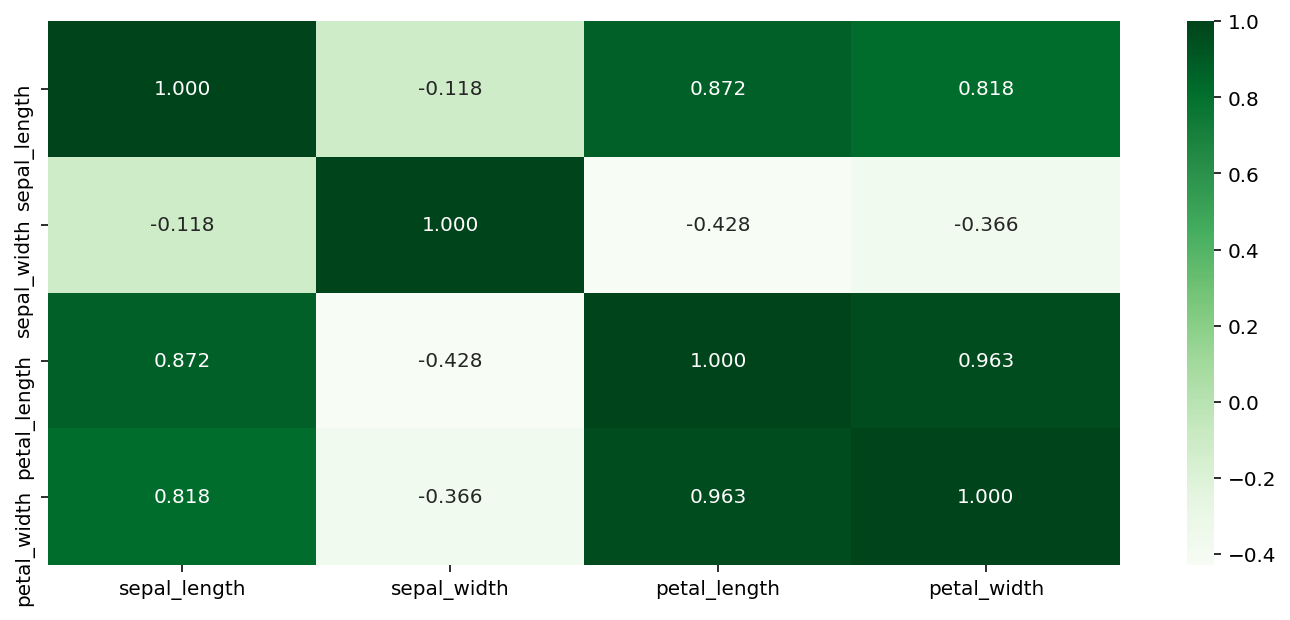

In [82]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.heatmap(r, annot=True, fmt='.3f', cmap='Greens')
plt.show()

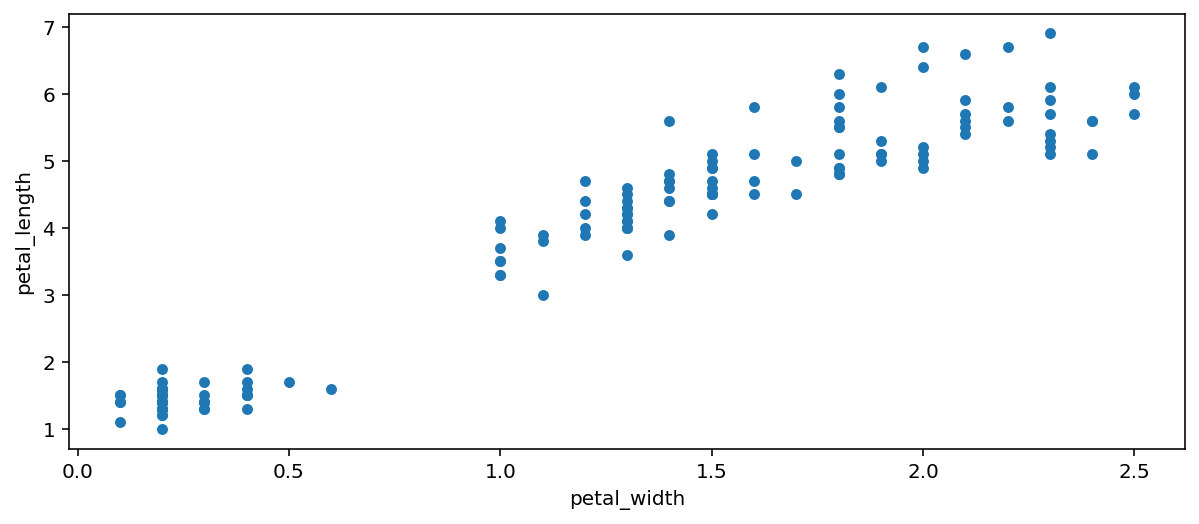

In [84]:
iris_df.plot(kind='scatter', x='petal_width', y='petal_length', figsize=(10,4))
plt.show()

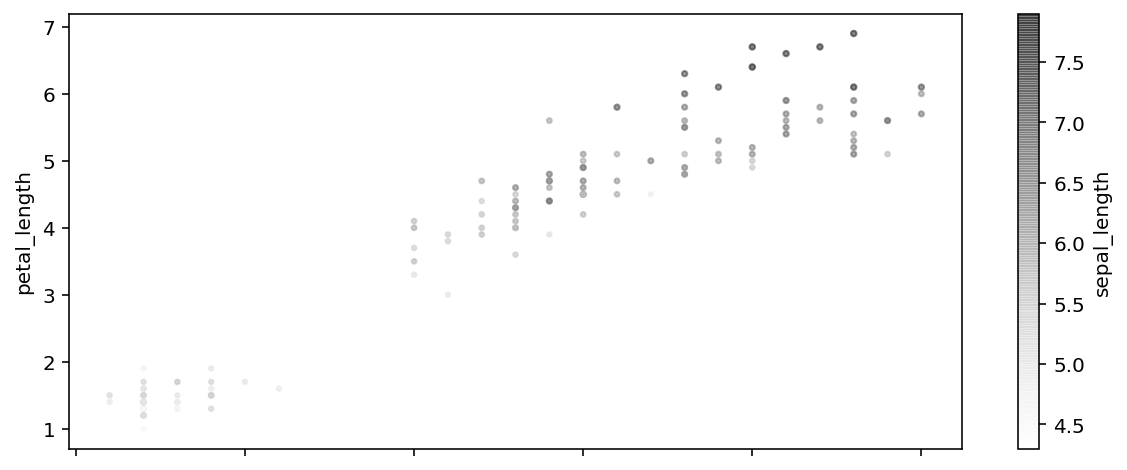

In [89]:
iris_df.plot(kind='scatter', x='petal_width', y='petal_length', figsize=(10,4),
            s='sepal_length',
            c='sepal_length', alpha=.5)
plt.show()

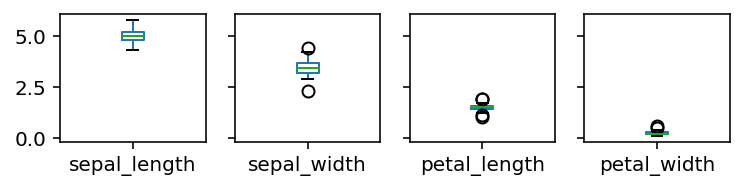

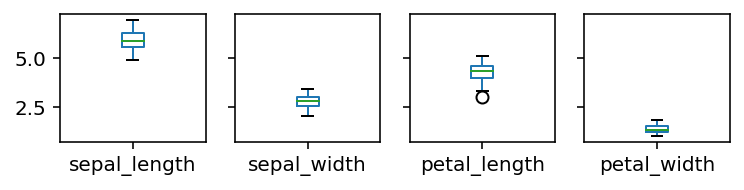

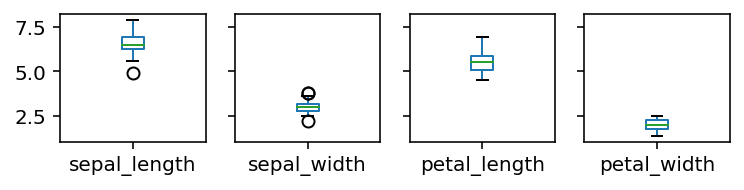

In [94]:
# 종별 boxplot
iris_df.groupby(['species']).plot(kind='box',
                                 subplots=True, # 열별로 서브플롯으로 boxplot을 그림
                                 sharey=True, # y축 공유
                                 layout=(3,4))
plt.show()

### 4)plt.scatter() : 산점도

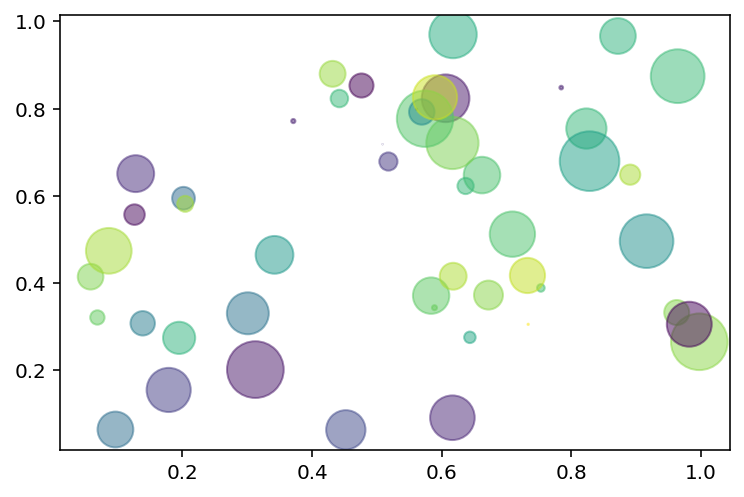

In [96]:
np.random.seed(2021)
N = 50
x = np.random.rand(N) # 난수 실수 50개
y = np.random.rand(N)
colors = np.random.rand(N)
area = (np.random.rand(N) *30) **2
plt.scatter(x, y, s=area, # 마커(점) 크기
               c=colors, # 색상
               alpha=0.5) #투명도 0(투명)~1(불투명)
plt.show()

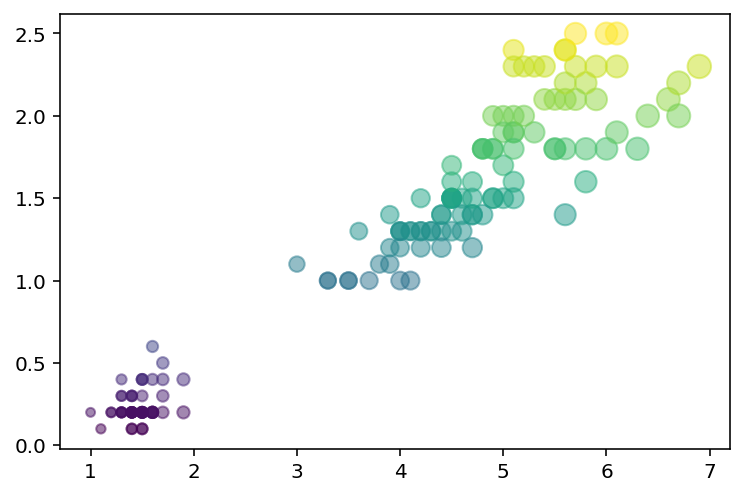

In [99]:
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width,
           s = iris_df.petal_length*20,
           c = iris_df.petal_width*20, alpha=.5)
plt.show()

## 2.5 다양한 그래프 그리기
### 1)fill(), fill_between() scatter()
### 2)bar(), barh(), axvline(), axhline()
### 3)hist(), boxplot(), violinplot()

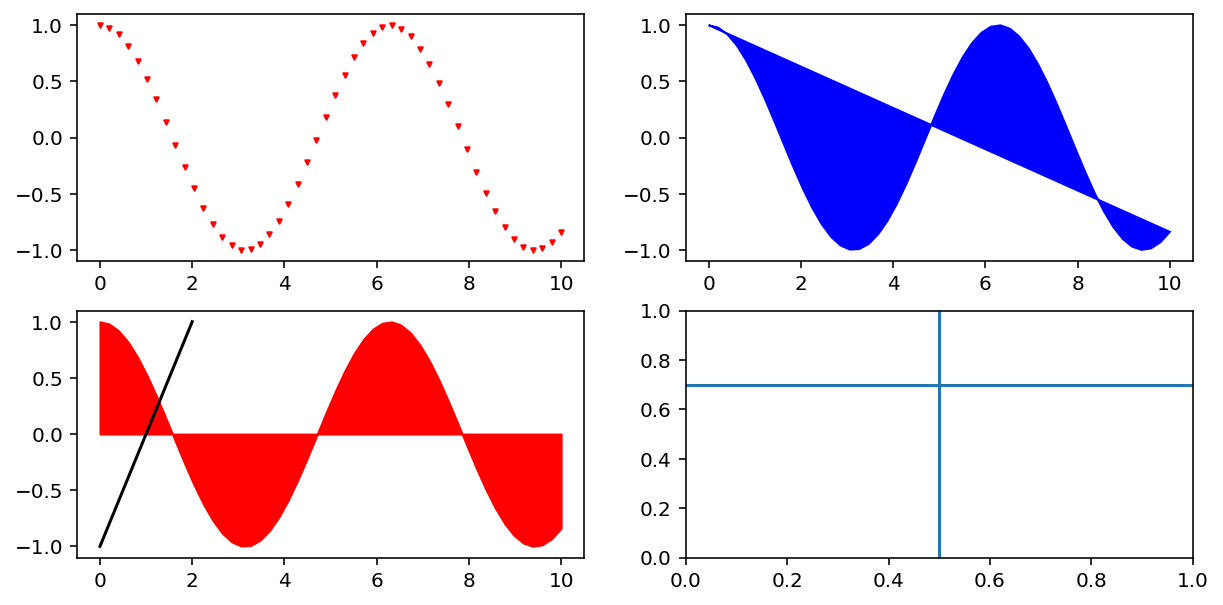

In [111]:
x = np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes[0,0].scatter(x, y, s=5, c='r', marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1,1],'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.7)
plt.show()

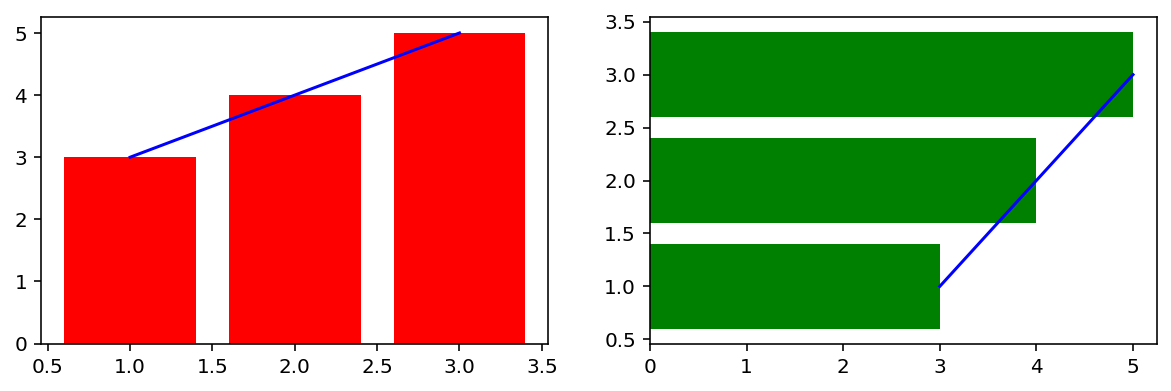

In [119]:
fit, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar([1,2,3],[3,4,5], color='r')
axes[0].plot([1,2,3],[3,4,5], color='b')
axes[1].barh([1,2,3],[3,4,5], color='g')
axes[1].plot([3,4,5],[1,2,3], color='b')

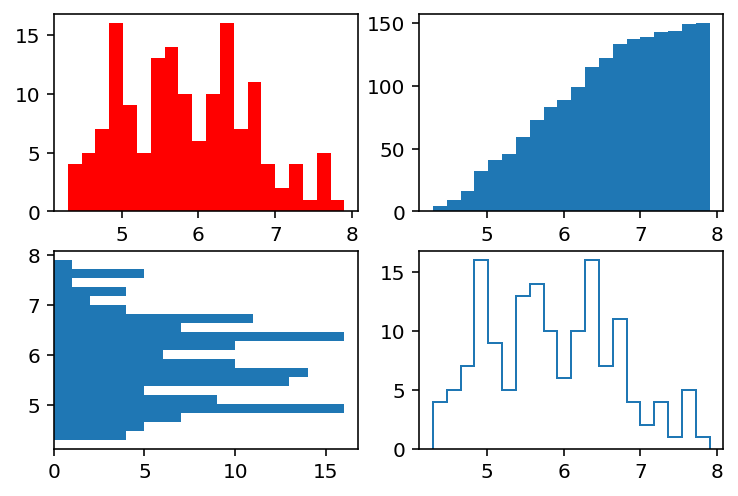

In [128]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(iris_df.sepal_length, bins=20, color='r') # 빈도표
axes[0,1].hist(iris_df.sepal_length, bins=20, cumulative=True) # 누적빈도표
axes[1,0].hist(iris_df.sepal_length, bins=20, orientation='horizontal') # 수평빈도표
axes[1,1].hist(iris_df.sepal_length, bins=20, histtype='step') 
plt.show()

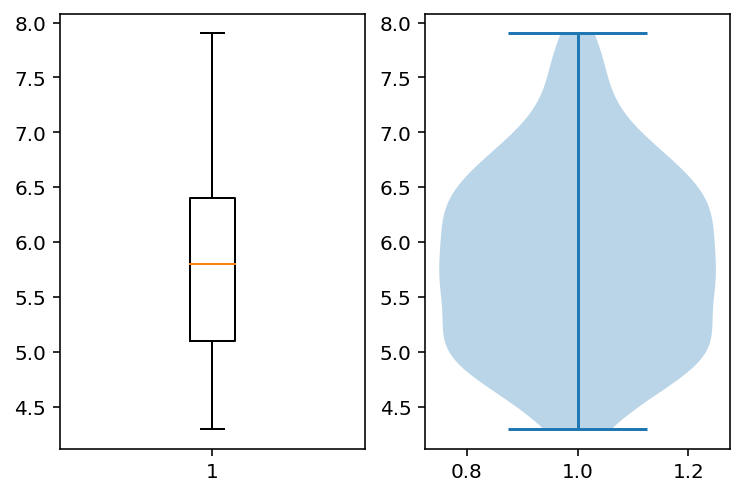

In [131]:
fig, axes = plt.subplots(1, 2)
axes[0].boxplot(iris_df.sepal_length)
axes[1].violinplot(iris_df.sepal_length)
plt.show()

## 2.6 그래프 커스터마이징
### 1) linestyle, linewidth
### 2) text(), annotate()

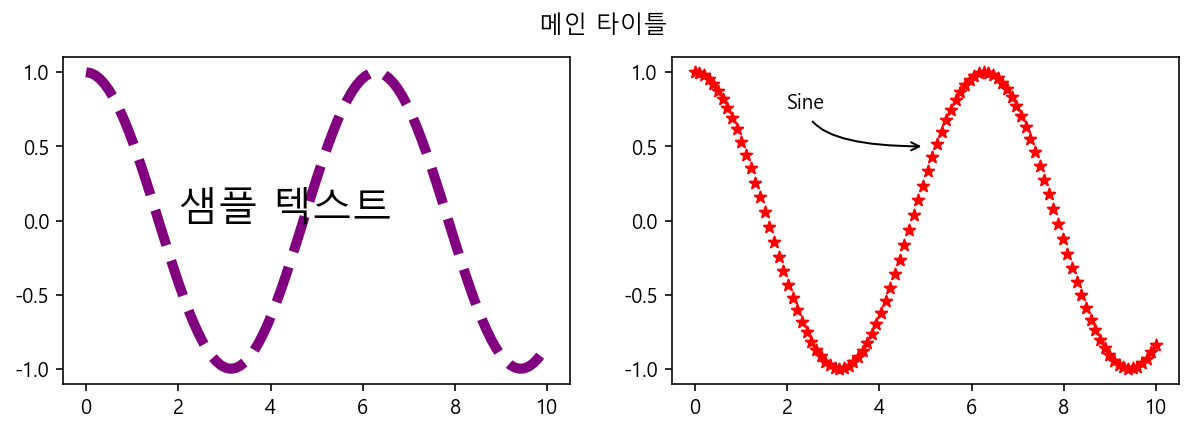

In [149]:
x = np.linspace(0,10, 100)
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(x, y, linewidth=5, linestyle='--', color='purple')
axes[0].text(2, 0, '샘플 텍스트', style='italic', fontsize=20)
axes[1].scatter(x, y, marker='*', color='r')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                 connectionstyle='angle3'))
plt.suptitle('메인 타이틀')
plt.show()

In [138]:
# 한글 기본폰트 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('fong', family='AppleGothic') #Mac
plt.rc('axes', unicode_minus=False) # 축

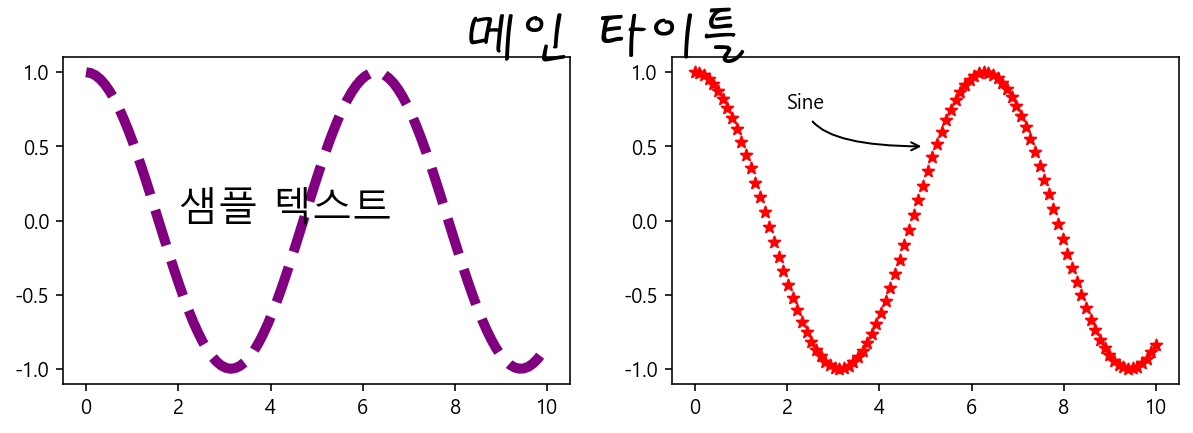

In [154]:
# 원하는 한글 폰트 지정
import matplotlib.font_manager as fm
font_path = 'c:/Windows/Fonts/HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=30)

fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(x, y, linewidth=5, linestyle='--', color='purple')
axes[0].text(2, 0, '샘플 텍스트', style='italic', fontsize=20)
axes[1].scatter(x, y, marker='*', color='r')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                 connectionstyle='angle3'))
plt.suptitle('메인 타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
https://matplotlib.org/users/mathtext.html

Text(2.5, 0.5, '$\\sum_{i=0}^\\infty X_i$')

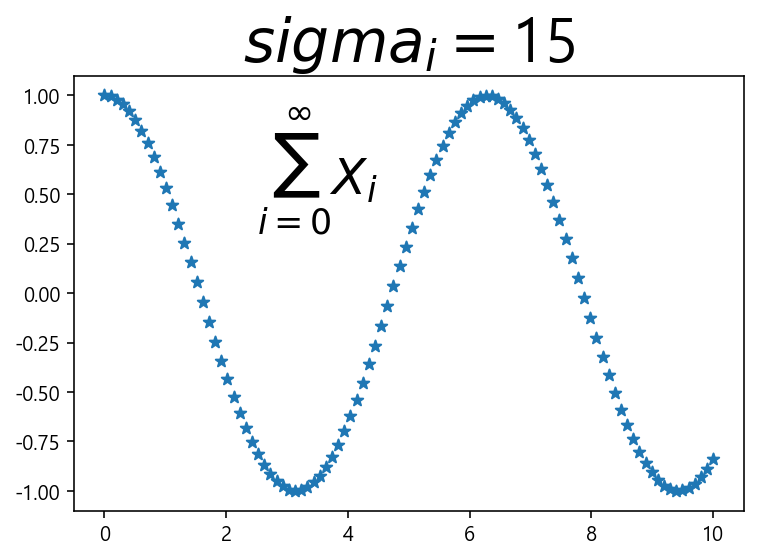

In [168]:
plt.scatter(x, y, marker='*')
plt.title(r'$sigma_i = $15', fontsize=30)
plt.text(2.5, 0.5, r'$\sum_{i=0}^\infty X_i$', fontsize=25)

In [174]:
# 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글설정
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic') #mac
plt.rc('axes', unicode_minus=False)
# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

### 4)축과 눈금

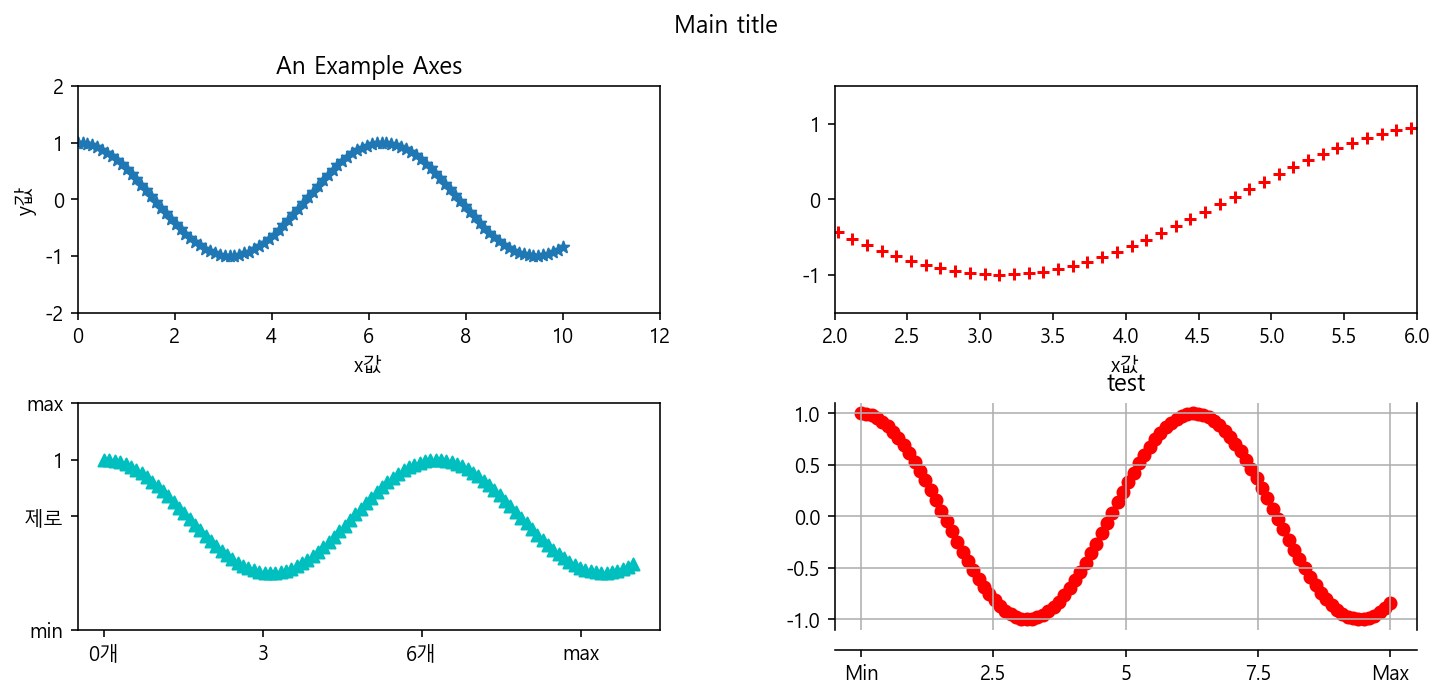

In [203]:
x = np.linspace(0,10, 100)
y = np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(12,5))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # 여백 조정(hspace위아래, wspace좌우)
plt.suptitle('Main title')
axes[0,0].scatter(x, y, marker='*')
axes[0,0].set(title='An Example Axes', ylabel='y값', xlabel='x값',
             xlim=[0,12], ylim=[-2,2])
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_xlim(2,6)
axes[0,1].set_xlabel('x값', fontsize=10)
axes[0,1].set_ylim(-1.5,1.5)
# 축 눈금 위치
axes[1,0].scatter(x, y, marker='^', c='c')
axes[1,0].set_xticks(range(0,11,3)) # 0,3,6,9
axes[1,0].set_xticklabels(['0개',3, '6개','max'])
axes[1,0].set_yticks([-2,0,1,2])
axes[1,0].set_yticklabels(['min','제로', 1,'max'])
axes[1,1].scatter(x, y, c='r')
axes[1,1].set(xticks=[0,2.5,5,7.5,10],
              xticklabels=['Min',2.5,5,7.5,'Max'],
             title='test')
axes[1,1].grid(True)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['bottom'].set_position(('outward',10))
plt.show()

### 5) 축공유

In [205]:
x = np.arange(0,10)
y1 = 0.5*x**2
y2 = -y1

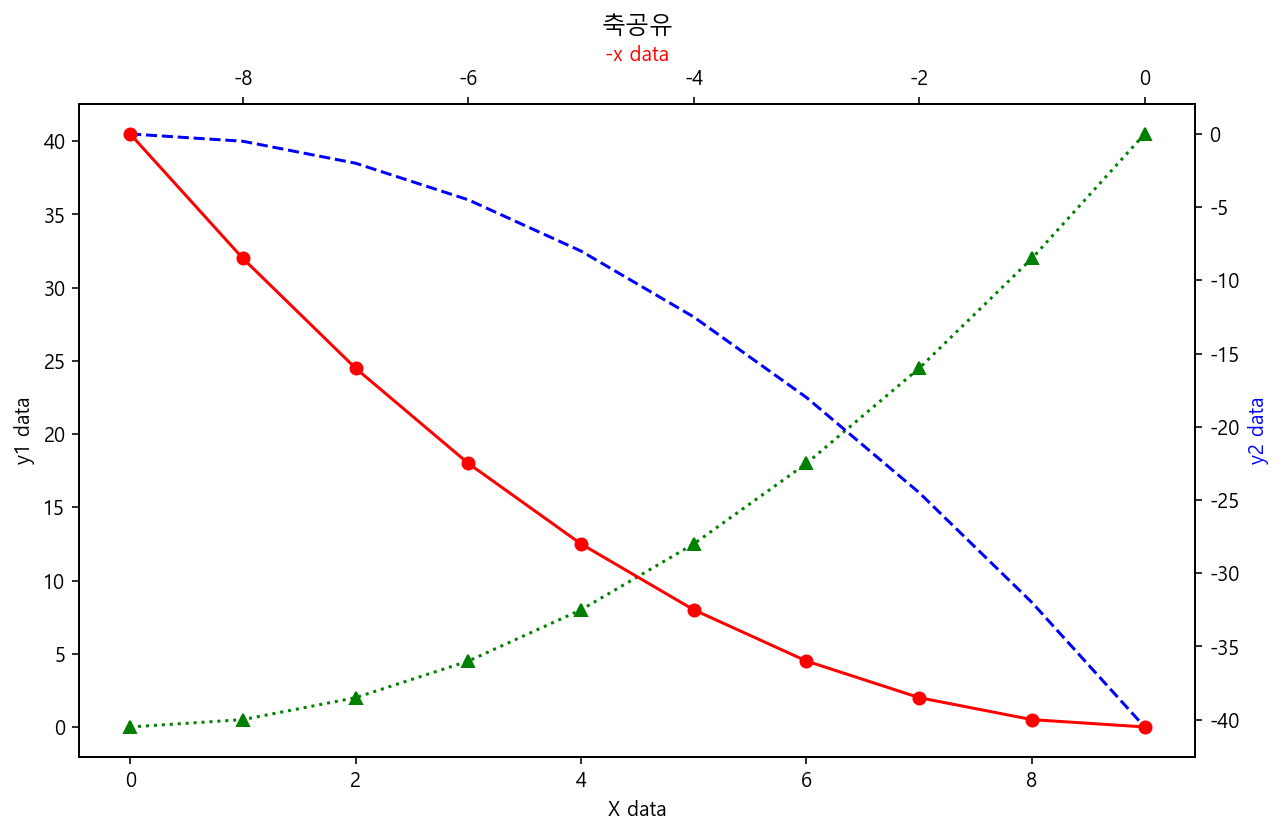

In [212]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x, y1, 'g^:')
ax1.set(xlabel="X data", ylabel='y1 data', title="축공유")

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 7) 범례표시

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례 사용 설명

In [214]:
x = np.arange(1,10)
y = 0.2*x ** 2

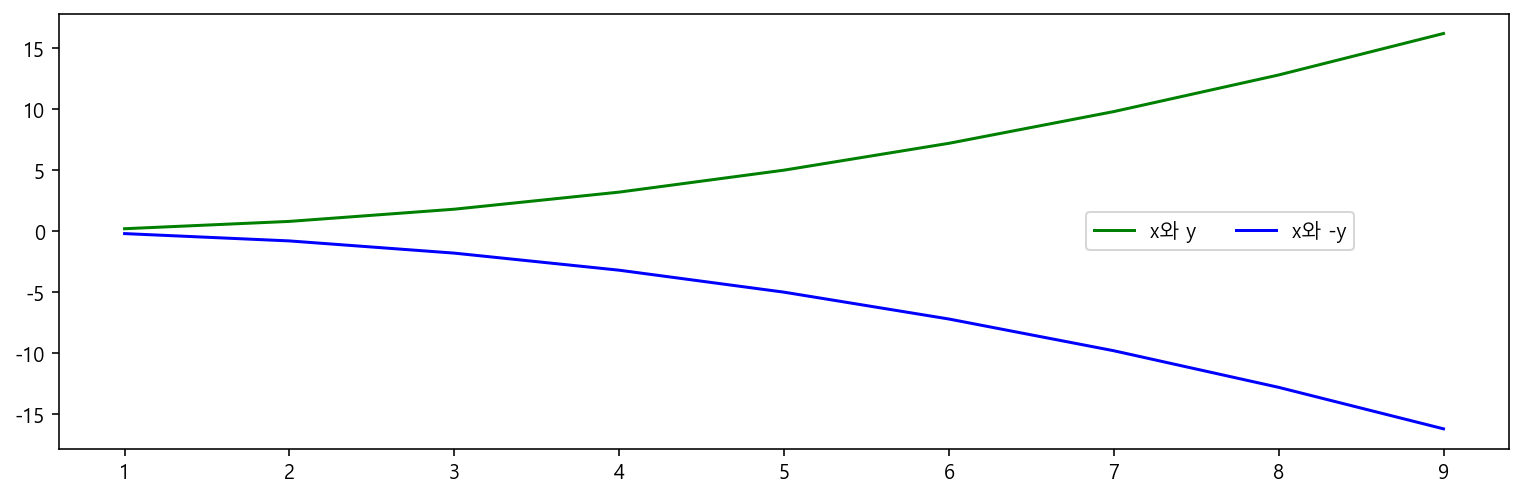

In [222]:
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(x, y, 'g', label='x와 y')
ax.plot(x, -y, 'b', label='x와 -y')
ax.legend()
plt.legend(loc='center right', bbox_to_anchor=(0.9, 0.5), ncol=2)
plt.savefig('data/ch13.png') # 그래프를 파일로 저장하고자 할 때